### Online materials
#### https://uni-bonn.sciebo.de/s/sAKexdj1YAgMAvB
<img src="qr-code.png" width="300">

In [ ]:
from myChem_templarte import Molecule

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = False
#IPythonConsole.molSize = 300,300
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [2]:
def mol_with_atom_index(mol,offset=1):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx()+offset)
    return mol

In [3]:
from rdkit import Chem

In [4]:
from rdkit import Chem
mol1 = Chem.MolFromSmiles('c1ccccc1O')
mol2 = Chem.MolFromSmiles('c1[nH]c2c(ncnc2n1)N')

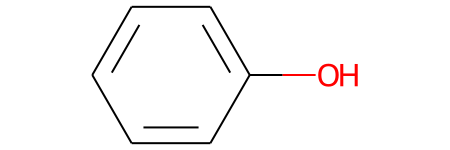

In [5]:
mol1

In [6]:
Chem.MolToMolFile(mol1,"phenol.mol")

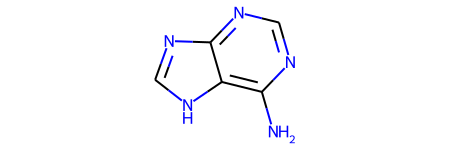

In [7]:
mol2

In [8]:
!type phenol.mol


     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  6  1  1  0
M  END


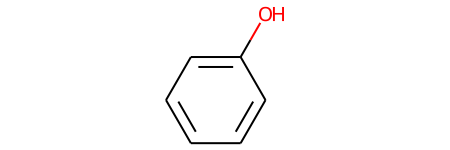

In [9]:
Chem.MolFromMolFile("phenol.mol")

In [10]:
mol1.SetProp("_Name","phenol")
sd=Chem.SDWriter("data.sdf")
sd.write(mol1)
sd.write(mol2)
sd.write(Chem.MolFromSmiles("CCO"))
sd.close()

In [11]:
sd=Chem.SmilesWriter("data.smi")
sd.write(mol1)
sd.write(mol2)
sd.write(Chem.MolFromSmiles("CCO"))
sd.close()

In [12]:
!type data.sdf

phenol
     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  6  1  1  0
M  END
$$$$

     RDKit          2D

 10 11  0  0  0  0  0  0  0  0999 V2000
    1.2760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3313    1.5000    0.0000 C   0  0  0  0  0  0  0  0  0 

In [13]:
suppl = Chem.SDMolSupplier('data.sdf')
mols = []
for mol in suppl:
    if mol is None:
        continue
    mols.append(mol)
    print(mol.GetProp('_Name'),mol.GetNumAtoms())
mols

phenol 7
 10
 3


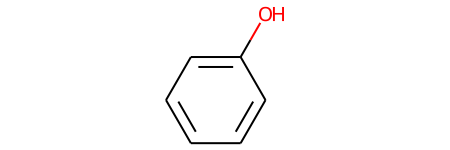

In [14]:
mols[0]

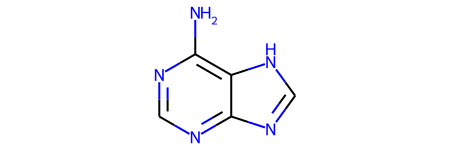

In [15]:
mols[1]

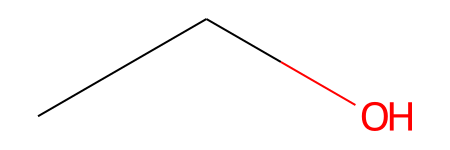

In [16]:
mols[2]

In [17]:
!type data.smi

SMILES Name 
Oc1ccccc1 phenol
Nc1ncnc2nc[nH]c12 1
CCO 2


In [18]:
suppl = Chem.SmilesMolSupplier ('data.smi')
for mol in suppl:
    if mol is None:
        continue
    print(mol.GetProp('_Name'),'has',mol.GetNumBonds(),'bonds')

phenol has 7 bonds
1 has 11 bonds
2 has 2 bonds


In [19]:
def mol_display(m):
    for at in m.GetAtoms():
        symbol = at.GetSymbol()
        # Note: The Atom class also has a method GetAtomicNum()
        idx = at.GetIdx() 
        nbors = [nbor.GetSymbol() for nbor in at.GetNeighbors()]
        print(f"Idx: {idx} Atom: {symbol} Neighbors: {nbors}",
        f"   Hydrogens: {at.GetTotalNumHs()}")

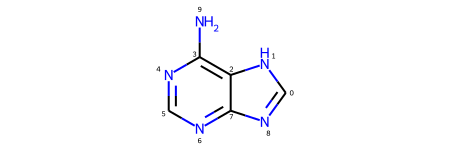

In [20]:
#m=Chem.MolFromSmiles("c1c2c(nc(n1)CNC(=O)C3CCN(CC3)C(=O)C4CCCC4)CCC2")
m = mols[1]
IPythonConsole.drawOptions.addAtomIndices = True
m

In [21]:
mol_display(m)

Idx: 0 Atom: C Neighbors: ['N', 'N']    Hydrogens: 1
Idx: 1 Atom: N Neighbors: ['C', 'C']    Hydrogens: 1
Idx: 2 Atom: C Neighbors: ['N', 'C', 'C']    Hydrogens: 0
Idx: 3 Atom: C Neighbors: ['C', 'N', 'N']    Hydrogens: 0
Idx: 4 Atom: N Neighbors: ['C', 'C']    Hydrogens: 0
Idx: 5 Atom: C Neighbors: ['N', 'N']    Hydrogens: 1
Idx: 6 Atom: N Neighbors: ['C', 'C']    Hydrogens: 0
Idx: 7 Atom: C Neighbors: ['N', 'N', 'C']    Hydrogens: 0
Idx: 8 Atom: N Neighbors: ['C', 'C']    Hydrogens: 0
Idx: 9 Atom: N Neighbors: ['C']    Hydrogens: 2


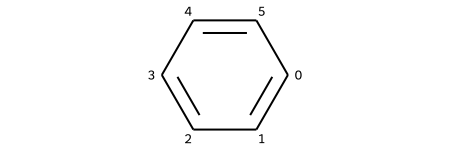

In [22]:
m=Chem.MolFromSmiles("C1=CC=CC=C1")
m

0 C 1 0
1 C 1 0
2 C 0 0
3 H 0 2
4 C 1 0
5 C 0 13
6 C 1 0


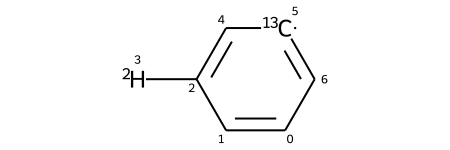

In [23]:
m=Chem.MolFromSmiles("c1cc([2H])c[13c]c1")
#mh=Chem.AddHs(m)
for at in m.GetAtoms():
    print(at.GetIdx(),at.GetSymbol(),at.GetTotalNumHs(),at.GetIsotope())
m

In [24]:
m=Chem.MolFromSmiles("C1CC=CCC1")
mH=Chem.AddHs(m)


In [25]:
[at.GetSymbol() for at in mH.GetAtoms()]

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [26]:
pt=Chem.GetPeriodicTable()

In [27]:
pt.GetAtomicWeight('Cl')

35.453

In [28]:
pt.GetAtomicWeight("O")

15.999

In [29]:
sum([pt.GetAtomicWeight(at.GetAtomicNum()) for at in mH.GetAtoms()])

82.14599999999994

In [30]:
#sum([pt.GetAtomicWeight(at.GetAtomicNum()) for at in mH.GetAtoms()])

In [31]:
#sum([pt.GetAtomicWeight(at.GetSymbol()) for at in mH.GetAtoms()])

In [32]:
#eight(at.GetAtomicNum()) for at in mH.GetAtoms()])

In [33]:
####

In [34]:
# exercise one

In [35]:

# write a function that take a molecule and return the proper result as indicated by the function name
def getNumberOfNitrogenAtoms(mol):
    molx = []
    molc=Chem.MolFromSmiles(mol)
    for atom in molc.GetAtoms():
        if atom.GetSymbol()=='N':
            molx.append(atom)
        else:continue
    return molx
    
    

In [36]:
getNumberOfNitrogenAtoms('ClC1=CC=CC=C1C2=NC(C(NC3=C2C=C(C=C3)Cl)=O)O')

In [37]:
molN = Chem.MolFromSmiles('ClC1=CC=CC=C1C2=NC(C(NC3=C2C=C(C=C3)Cl)=O)O')
molH= Chem.MolFromSmiles('ClC1=CC=CC=C1C2=NC(C(NC3=C2C=C(C=C3)Cl)=O)O')


In [38]:
#print(molN.GetAtoms())

In [39]:
molN.GetNumAtoms()
    

21

In [ ]:
# getting for the number of nitrogen 

In [2]:
def getNNumberOfNitrogenAtoms(mol):
    mols = []
    molc=Chem.MolFromSmiles(mol)
    
    for m in molc.GetAtoms():
        if m.GetSymbol() =='N':
            mols.append(m.GetAtomicNum())
        else: continue
    return len(mols)

In [3]:
getNNumberOfNitrogenAtoms('ClC1=CC=CC=C1C2=NC(C(NC3=C2C=C(C=C3)Cl)=O)O')

2

In [5]:
# getting for the nuber of hydrogen

In [6]:
def getNumberOfHydrogenAtoms(mol):
    mols = []
    molc=Chem.MolFromSmiles(mol)
    
    for m in molc.GetAtoms():
        if m.GetSymbol() =='N':
            mols.append(m.GetAtomicNum())
        else: continue
    return len(mols)